
#Heart disease Onset Prediction ​Tool 
## CS 539 Machine learnnig
### Group 11
<br>Chaokai Zhang
<br>Abdulsalam Almadani
<br>Trusting Inekwe
<br>Winnie Mkandawire

In [35]:
! git clone https://github.com/dralmadani/MachineLearning

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


# import libraries

In [36]:
#import libraries
import pandas as pd
import numpy as np
# from sklearn.preprocessing import normalize


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns

#to imprve Machine learning models
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Import Machin Learning Models

In [37]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
#from sklearn.ensemble import RandomForestClassifier

#Import data before cleaning

In [38]:
#%% Import train dataset
# Change your own dictionary where dataset located
dr = "/content/MachineLearning/Cardiovascular_Disease/"
Cardio_Profile = loadmat(dr+'cadio_rawDataBeforcleaning.mat')

Cardio_raw = Cardio_Profile['cardiotrain_raw']
# split triandata:x and result:y
x = Cardio_raw [:,1:11]
y = Cardio_raw [:,12]
df =pd.DataFrame(data = Cardio_raw, columns= ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio'])
df.head()
x = df.drop(labels=['cardio','id'], axis=1)
y = df['cardio']

#x.head()
#y.head()


In [39]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance ( After GridSearchCV ) "

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

In [49]:
def confusionMatreix(y_test,y_predict):
#Confusion Matrix  
    cm = confusion_matrix(y_test,y_predict)

    # make a math 
    TN,FP,FN,TP = confusion_matrix(y_test,y_predict).ravel()
    print ('TP:{}\tFP:{}\tFN:{}\tTN:{}'.format(TP,FP,FN,TN ))
    #accuracy = (TP + TN) / (P + N )
    #accuracy = (TP + TN) / ( len(y_train))*100
    accuracy = accuracy_score(y_true=y_test,y_pred=y_predict)
    print ('Accuracy:\t',accuracy,'%')

    # precision  = TP / (TP + FP)
    precision  = TP / (TP + FP)
    print ('Precision:\t',precision * 100,'%' )
    # recall = TP/(TP+FN)
    recall = TP/(TP+FN)
    print ('Recall:\t\t', recall* 100,'%')

    F1 = 2 * (precision * recall)/ (precision + recall)
    print ('my F1 measure:\t', F1 * 100,'%')

    f1 = f1_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    print ("sklean_f1_score:\t", f1)
    
    print('Confusion Matrix\n', cm)

    # plot Confusion Matrix
    f,ax = plt.subplots(figsize =(5,5))
    sns.heatmap(cm, annot=True)


    plt.xlabel ('y_pred')
    plt.ylabel ('y_test')
    #plt.title ('Naive Bayes Classifier')
    
    plt.show()

# using model on Row data ( befor Cleaning ) 

In [40]:
#%% Split data 
# use random_state to make a fixed train and test dataset
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=555)

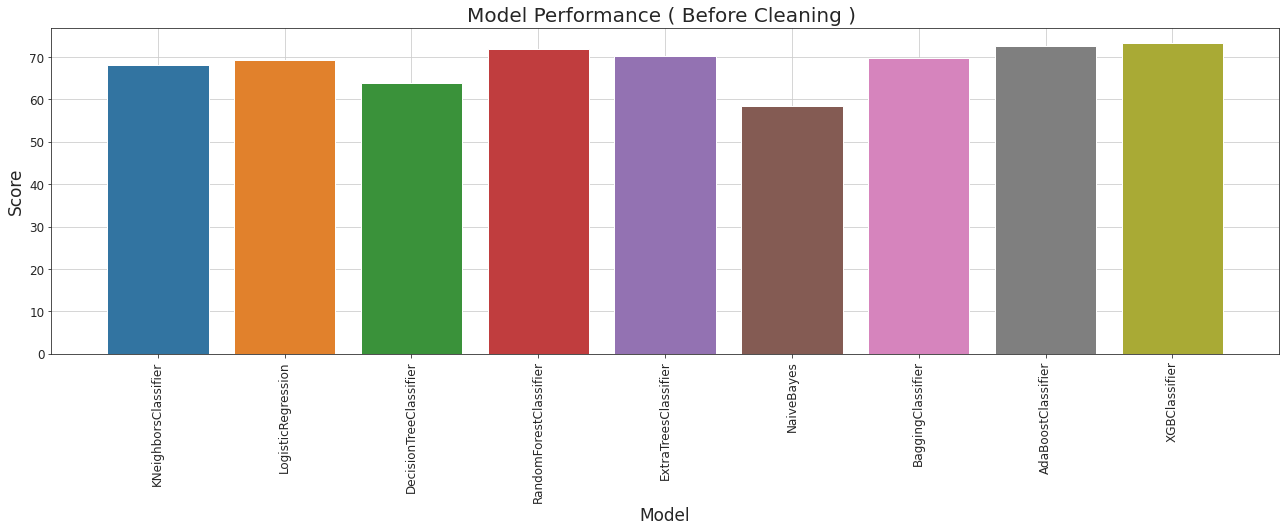

                    model      score
0    KNeighborsClassifier  68.164286
1      LogisticRegression  69.392857
2  DecisionTreeClassifier  63.964286
3  RandomForestClassifier  71.821429
4    ExtraTreesClassifier  70.292857
5              NaiveBayes  58.350000
6       BaggingClassifier  69.671429
7      AdaBoostClassifier  72.614286
8           XGBClassifier  73.250000


In [ ]:

models = {

    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    #"SVC": svm.SVC(kernel="linear",random_state=10), # take long time more then 30 min
    "NaiveBayes": GaussianNB(),
    #"MultinomialNB": MultinomialNB(), # need to clean the data before working
    "BaggingClassifier": BaggingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": xgb.XGBClassifier(random_state=123)

}



prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(x_train,y_train)
    prediction[model_name] = model.predict(x_test)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score

result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

plot_model_performace(result)


TP:4899	FP:1565	FN:2180	TN:5356
Accuracy:	 0.7325 %
Precision:	 75.78898514851485 %
Recall:		 69.20468992795593 %
my F1 measure:	 72.34733810824781 %
sklean_f1_score:	 0.723473381082478
Confusion Matrix
 [[5356 1565]
 [2180 4899]]


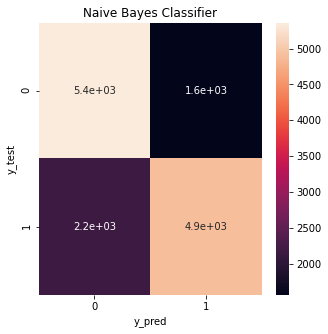

In [41]:
# confusion Matreix for GridSearch
model = xgb.XGBClassifier(random_state=123)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confusionMatreix(y_test,y_pred)





# Using clean file 

In [42]:
#%% Import train dataset
# Change your own dictionary where dataset located
dr = "/content/MachineLearning/Cardiovascular_Disease/"
Cardio_Profile = loadmat(dr+'cadio_filter.mat')
Cardio_raw = Cardio_Profile['cardiotrain']
# split triandata:x and result:y
x = Cardio_raw [:,1:11]
y = Cardio_raw [:,12]

In [43]:
# Split data 
# use random_state to make a fixed train and test dataset
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=555)


# Applied models 

In [ ]:

models = {
   

    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=10),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=10),
    "RandomForestClassifier": RandomForestClassifier(random_state=10),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=10),
    "SVC": svm.SVC(kernel="linear",random_state=10),
    "NaiveBayes": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BaggingClassifier": BaggingClassifier(random_state=10),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=10),
    "XGBClassifier": xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    
}

prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(x_train,y_train)
    prediction[model_name] = model.predict(x_test)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score

In [ ]:
result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

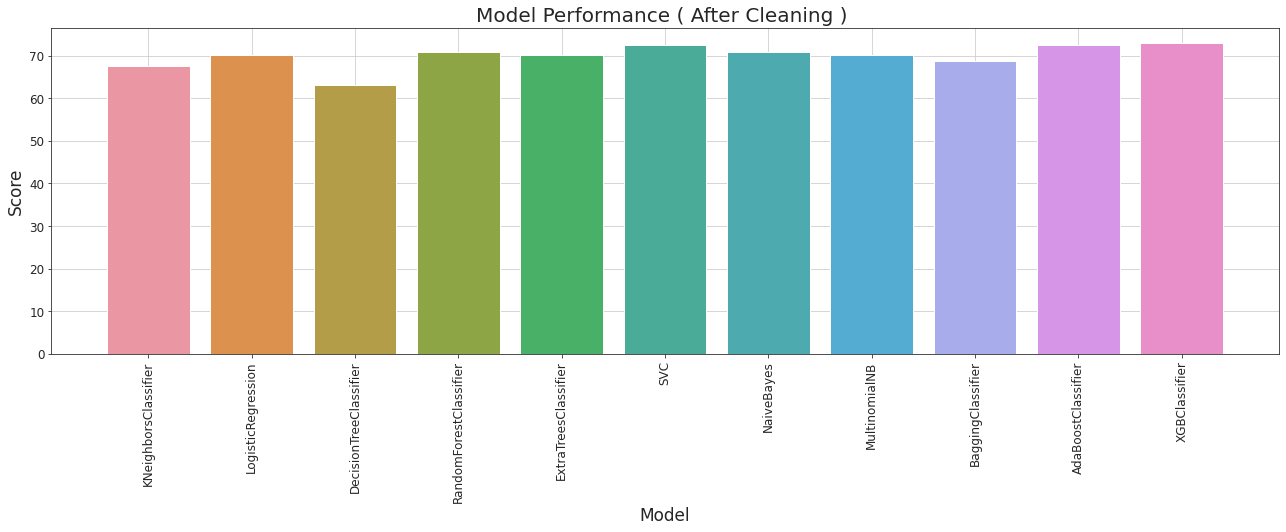

                     model      score
0     KNeighborsClassifier  67.564812
1       LogisticRegression  70.084474
2   DecisionTreeClassifier  63.151762
3   RandomForestClassifier  70.856394
4     ExtraTreesClassifier  70.091756
5                      SVC  72.509467
6               NaiveBayes  70.878241
7            MultinomialNB  70.164579
8        BaggingClassifier  68.846490
9       AdaBoostClassifier  72.567725
10           XGBClassifier  72.931838


In [ ]:
plot_model_performace(result)


#To Dataframe

In [44]:

df =pd.DataFrame(data = Cardio_raw, columns= ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio'])
display (df.describe().T)
#df.head()           

,count,mean,std,min,25%,50%,75%,max
id,68658.0,49975.571077,28847.961467,0.0,25000.5,50020.5,74875.5,99999.0
age,68658.0,19464.095866,2468.196792,10798.0,17657.0,19700.0,21324.0,23713.0
gender,68658.0,1.348597,0.476530,1.0,1.0,1.0,2.0,2.0
height,68658.0,164.395933,7.984337,100.0,159.0,165.0,170.0,250.0
weight,68658.0,74.116649,14.299100,30.0,65.0,72.0,82.0,200.0
ap_hi,68658.0,126.559075,16.550980,80.0,120.0,120.0,140.0,200.0
ap_lo,68658.0,81.355996,9.567958,45.0,80.0,80.0,90.0,180.0
cholesterol,68658.0,1.364531,0.678901,1.0,1.0,1.0,1.0,3.0
gluc,68658.0,1.225888,0.571901,1.0,1.0,1.0,1.0,3.0
smoke,68658.0,0.087972,0.283257,0.0,0.0,0.0,0.0,1.0


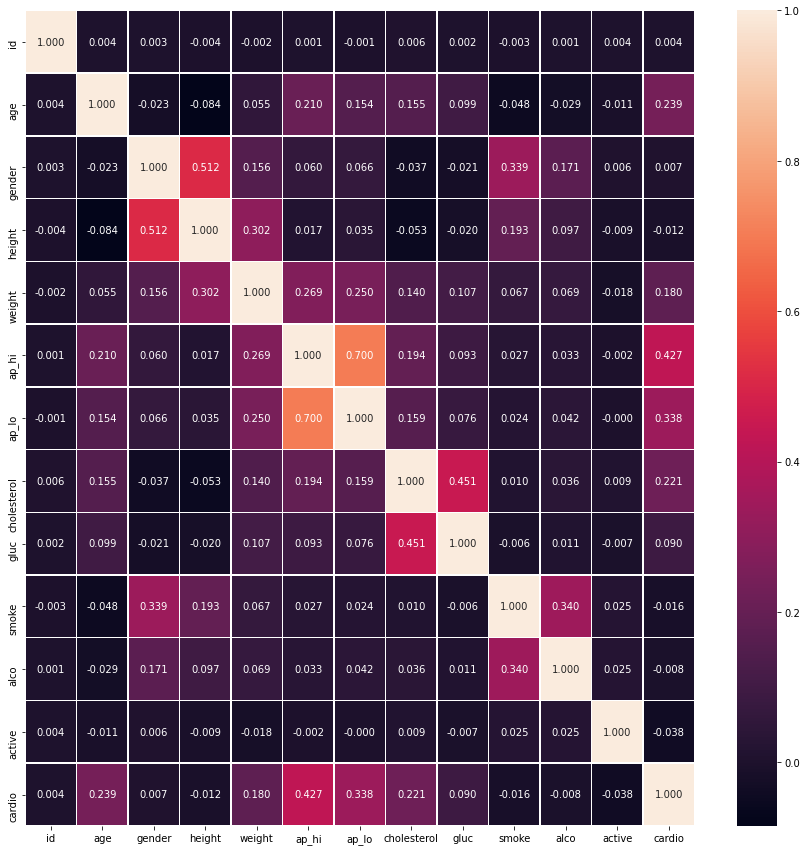

In [ ]:
corr =df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

# Using GridSearchSV to check the hyperprameter 

In [ ]:
# LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(1,30,2)} # (3,5,6 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))
log_reg_cv

Tuned hyperparameter n_estimators: {'C': 19, 'penalty': 'l1'}
Best score: 0.7262315996118692


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=200, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#SVM

SVC_improve = svm.SVC() #max_iterint =-1 ,  -1 mean no limit.


grid = { 'kernel':['linear','rbf','poly'],
        'decision_function_shape':['ovo', 'ovr'],
    'C': np.arange(1,10,2)
    } # (1,3,5 ... 30)
         #"C" : np.arange(1,30,2)} 
SVC_improve_cv = GridSearchCV(SVC_improve, grid, cv=3)
SVC_improve_cv.fit(x_train, y_train)
y_pred = SVC_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(SVC_improve_cv.best_params_)) 
print("Best score: {}".format(SVC_improve_cv.best_score_))
print("test score: {}".format(score))


In [ ]:
#KNN

KNN_improve = KNeighborsClassifier()
grid = { 'algorithm':[ 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(1,15,1)}
KNN_improve_cv = GridSearchCV(KNN_improve, grid, cv=3)
KNN_improve_cv.fit(x_train, y_train)
y_pred = KNN_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(KNN_improve_cv.best_params_)) 
print("Best score: {}".format(KNN_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'algorithm': 'kd_tree', 'leaf_size': 3}
Best score: 0.6782033934336403
test score: 0.675575298572677


In [ ]:
#Decision Tree Classifier

DTree_improve = DecisionTreeClassifier()
grid = { 'criterion':["gini", "entropy"],
        "splitter":['best', 'random']
        }
DTree_improve_cv = GridSearchCV(DTree_improve, grid, cv=3)
DTree_improve_cv.fit(x_train, y_train)
y_pred = DTree_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(DTree_improve_cv.best_params_)) 
print("Best score: {}".format(DTree_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'criterion': 'entropy', 'splitter': 'best'}
Best score: 0.635891898572081
test score: 0.6330468977570638


In [ ]:
#Random Forest Classifier

RForest_improve = RandomForestClassifier( random_state=10)
grid = { 'criterion':["gini", "entropy"]
        }

RForest_improve_cv = GridSearchCV(RForest_improve, grid, cv=3)
RForest_improve_cv.fit(x_train, y_train)
y_pred = RForest_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(RForest_improve_cv.best_params_)) 
print("Best score: {}".format(RForest_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'criterion': 'entropy'}
Best score: 0.7090266756784093
test score: 0.7122778910573843


In [ ]:
#AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None

#AdaBoostClassifier

AdaBoost_improve = AdaBoostClassifier( random_state=10)
grid = { 'n_estimators': np.arange(10,100,10),
         'learning_rate': np.arange(1,3,1),
        'algorithm':['SAMME', 'SAMME.R']
        }

AdaBoost_improve_cv = GridSearchCV(AdaBoost_improve, grid, cv=3)
AdaBoost_improve_cv.fit(x_train, y_train)
y_pred = AdaBoost_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(AdaBoost_improve_cv.best_params_)) 
print("Best score: {}".format(AdaBoost_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 90}
Best score: 0.7294541241440925
test score: 0.7260413632391495


In [ ]:
#BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

#BaggingClassifier

model_improve = BaggingClassifier( random_state=10)
grid = { 'n_estimators': np.arange(10,100,20),
        #'bootstrapbool':[True, False], #default=True
        #'warm_startbool' :[True,False],
        #'verboseint':np.arange(0,5,1)
         
        }

model_improve_cv = GridSearchCV(model_improve, grid, cv=3)
model_improve_cv.fit(x_train, y_train)
y_pred = model_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(model_improve_cv.best_params_)) 
print("Best score: {}".format(model_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'n_estimators': 90}
Best score: 0.7047481733347479
test score: 0.7081998252257501


In [ ]:
#ExtraTreesClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
#ExtraTreesClassifier

model_improve = ExtraTreesClassifier( random_state=10)
grid = { 'criterion':[ "gini","entropy"],
        'n_estimators': np.arange(10,100,10),
        }

model_improve_cv = GridSearchCV(model_improve, grid, cv=3)
model_improve_cv.fit(x_train, y_train)
y_pred = model_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(model_improve_cv.best_params_)) 
print("Best score: {}".format(model_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'criterion': 'gini', 'n_estimators': 90}
Best score: 0.6981939142305068
test score: 0.7008447422079813


In [ ]:
#XGBClassifier Test 1

model_improve = xgb.XGBClassifier ( objective="binary:logistic",random_state=10)
grid = { 'n_estimators': np.arange(10,100,10),
         'learning_rate': np.arange(1,3,1),
        }

model_improve_cv = GridSearchCV(model_improve, grid, cv=3)
model_improve_cv.fit(x_train, y_train)
y_pred = model_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(model_improve_cv.best_params_)) 
print("Best score: {}".format(model_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'learning_rate': 1, 'n_estimators': 10}
Best score: 0.7328586836404817
test score: 0.7285901543839207


In [ ]:
#XGBClassifier Test 2

model_improve = xgb.XGBClassifier ( objective="binary:logistic",random_state=10)
grid = { 'n_estimators': np.arange(100,700,100),
         'learning_rate': np.arange(0.01,1,0.02),
        }

model_improve_cv = GridSearchCV(model_improve, grid, cv=3)
model_improve_cv.fit(x_train, y_train)
y_pred = model_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(model_improve_cv.best_params_)) 
print("Best score: {}".format(model_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'learning_rate': 0.06999999999999999, 'n_estimators': 400}
Best score: 0.7340967113325009
test score: 0.7309204777162831


# Models after upadate the hyperparmeter

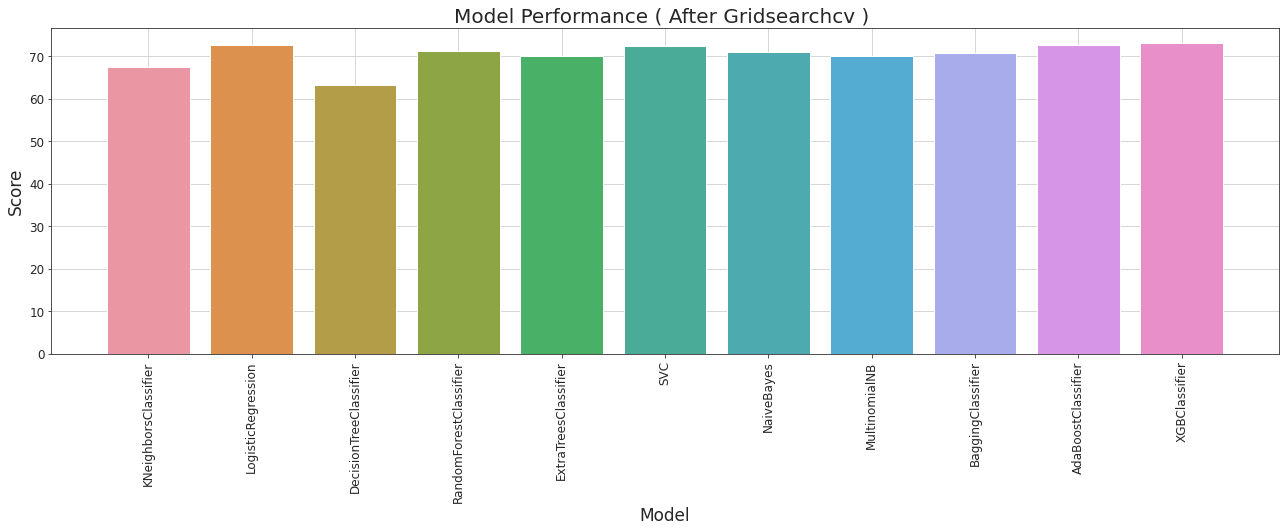

                     model      score
0     KNeighborsClassifier  67.557530
1       LogisticRegression  72.633265
2   DecisionTreeClassifier  63.341101
3   RandomForestClassifier  71.227789
4     ExtraTreesClassifier  70.084474
5                      SVC  72.509467
6               NaiveBayes  70.878241
7            MultinomialNB  70.164579
8        BaggingClassifier  70.819983
9       AdaBoostClassifier  72.604136
10           XGBClassifier  73.070201


In [ ]:
models = {
    "KNeighborsClassifier": KNeighborsClassifier(algorithm= 'kd_tree', leaf_size = 3),
    "LogisticRegression": LogisticRegression( solver="liblinear",C=7, penalty= 'l1',random_state=10),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion= 'entropy', splitter= 'best',random_state=10),
    "RandomForestClassifier": RandomForestClassifier(criterion= 'entropy',random_state=10),
    "ExtraTreesClassifier": ExtraTreesClassifier(criterion= 'gini',n_estimators=90,random_state=10),
    "SVC": svm.SVC(kernel="linear",random_state=10),
    "NaiveBayes": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BaggingClassifier": BaggingClassifier(n_estimators = 90, random_state=10),
    "AdaBoostClassifier": AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 90,random_state=10),
    "XGBClassifier": xgb.XGBClassifier(objective="binary:logistic", learning_rate= 0.06999, n_estimators= 400,random_state=10)#42
    
}

prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(x_train,y_train)
    prediction[model_name] = model.predict(x_test)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score

result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

plot_model_performace(result)


TP:4455	FP:1450	FN:2308	TN:5519
Accuracy:	 0.7263326536556948 %
Precision:	 75.44453852667232 %
Recall:		 65.87313322490019 %
my F1 measure:	 70.3347016103568 %
sklean_f1_score:	 0.7033470161035681
Confusion Matrix
 [[5519 1450]
 [2308 4455]]


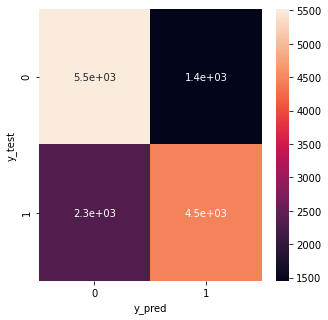

In [50]:
# confusion Matreix for GridSearch
model = LogisticRegression( solver="liblinear",C=7, penalty= 'l1',random_state=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confusionMatreix(y_test,y_pred)





In [51]:

     
#Feature Selection
xgbC = xgb.XGBClassifier(objective="binary:logistic", learning_rate= 0.06999, n_estimators= 400,random_state=10).fit(x_train,y_train)
sorted(list(xgbC.feature_importances_) , reverse=True) 
# we will remove any feature its importanc less than or equal zero
results=pd.DataFrame()


results['importances'] = xgbC.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)
display(results.head(20))

results = results[results.importances > 0.02]

selected_cols = list(results.index)


Final_x_train = x_train[:, [4,6,0,5]]#[:, [4,6,0,5,3,2]]
Final_x_test = x_test [:, [4,6,0,5]]
Final_x_train.shape

,importances
4,0.619679
6,0.162802
0,0.059919
5,0.044268
8,0.031100
7,0.024688
9,0.021482
3,0.019472
1,0.009777
2,0.006813


(54926, 4)

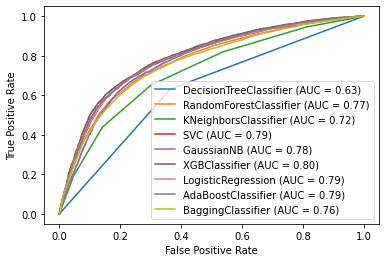

In [48]:
# ROC Different Model
det = DecisionTreeClassifier(criterion= 'entropy', splitter= 'best',random_state=10) # Decision Tree
ran = RandomForestClassifier(criterion= 'entropy',random_state=10) # Random Forest 
knn = KNeighborsClassifier(algorithm= 'kd_tree', leaf_size = 3)  # KNN
svm = SVC(kernel="linear",random_state=10) # Spport vector machine
naive = GaussianNB() # Naive Bayes 
xgb_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate= 0.06999, n_estimators= 400,random_state=10)
lr = LogisticRegression(solver="liblinear",C=7, penalty= 'l1',random_state=10)
Adaboost = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 90,random_state=10)
Bag = BaggingClassifier(n_estimators = 90, random_state=10)
NBM = MultinomialNB(),
# Define Model
models = {"Decision tree" : det,
          "Random forest" : ran,
          "SVM" : svm,
          "KNN" : knn,
          "Naive bayes" : naive,
          'XGBoost': xgb_model,
          'Logistic Rgression':lr,
          'Adaboost' : Adaboost,
          'Bagging':Bag,
}
scores= { }
# Fit    
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)
# Score
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame
# ROC score
disp = plot_roc_curve(det,x_test,y_test)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(naive,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb_model,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Adaboost,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Bag,x_test,y_test,ax=disp.ax_)